<a href="https://colab.research.google.com/github/variableVG/CV_project/blob/master/05_data_normalization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Normalization


In this notebook we normalize the figures and then save them as tensors. The tensors will be used in the next notebook for the convolutional neural network.

We use normalization to speed up the computation in the model and learn faster by reducing the skewness of the pixels. To achieve normalization we used the method torchvision.transforms.Normalize(). This method does not support PIL Images. Therefore, we first need to transform the pictures into tensors and then apply normalization. The normalized pictures will be stored as a tensors and used in the convolutional neural network. 

The Images will be convert to tensors using torchvision.transforms.ToTensor(). This converts the PIL image with a pixel range of 0 to 255 to a PyTorch FloatTensor of shape (C, H, W) with a range from 0 to 1.

To normalize the images, we transform their values such as the mean and the standard deviation of the image become 0 and 1 respectively. Therefore Normalize() takes 2 parameters: 
* Mean: Sequence of means for each channel
* Std: Sequence of standard deviations for each channel. 

It returns a normalized tensor image 



Sources: 
* https://pytorch.org/vision/stable/generated/torchvision.transforms.ToTensor.html
* https://pytorch.org/vision/main/generated/torchvision.transforms.Normalize.html
* https://inside-machinelearning.com/en/why-and-how-to-normalize-data-object-detection-on-image-in-pytorch-part-1/

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Import Data and images

In [ ]:
path_to_pictures = '/content/pic/'
path_to_dataset = '/content/drive/MyDrive/Colab Notebooks/CVNLP/dataset_faces_small.csv'

In [ ]:
! pip install gdown
! mkdir -p /content/pic/
! gdown -O /content/pictures_small.tar "1ldp2lrGl_RXxtS7u2pUCdSAwIbXEiG40"

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Downloading...
From: https://drive.google.com/uc?id=1ldp2lrGl_RXxtS7u2pUCdSAwIbXEiG40
To: /content/pictures_small.tar
100% 10.8M/10.8M [00:00<00:00, 110MB/s]


In [ ]:
import tarfile
try: 
  tar = tarfile.open('/content/pictures_small.tar')
  tar.extractall(path='/content/pic')
  tar.close()
except:
  print("Pictures could not be extracted")

In [ ]:
! mv /content/pic/content/small_pics/* /content/pic/
! rmdir /content/pic/content

rmdir: failed to remove '/content/pic/content': Directory not empty


In [ ]:
import pandas as pd
import numpy as np
import torchvision.transforms as T
import matplotlib.pyplot as plt
from PIL import Image
import torch

In [ ]:
df = pd.read_csv(path_to_dataset)

In [ ]:
df.head()

,filename,age,gender,ethnicity
0,36_1_1_20170116223054510.jpg,36,1,1
1,36_1_1_20170117165628076.jpg,36,1,1
2,37_0_0_20170117140720825.jpg,37,0,0
3,37_0_1_20170116193744974.jpg,37,0,1
4,37_0_1_20170117140332549.jpg,37,0,1


In [ ]:
df.shape

(2501, 4)

## Get pictures as numpy arrays

In [ ]:
# WARNING: This might take long
from tqdm import tqdm
from pathlib import Path
images = []

for image in tqdm(df['filename']):
  path = path_to_pictures + image
  try: 
    img = Image.open(path).convert('RGB') # I use that to make sure all the pictures are RGB
    images.append(img)
    #img = np.array(img)
  except FileNotFoundError as e:
    print(e)
  

100%|██████████| 2501/2501 [00:00<00:00, 2565.26it/s]


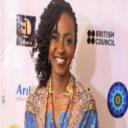

In [ ]:
images[0]

In [ ]:
# Check sizes
for idx, img in enumerate(images[0:5]):
  img_array = np.array(img)
  print(f"Image {idx} has shape {img_array.shape}")

Image 0 has shape (128, 128, 3)
Image 1 has shape (128, 128, 3)
Image 2 has shape (128, 128, 3)
Image 3 has shape (128, 128, 3)
Image 4 has shape (128, 128, 3)


In [ ]:
img_size = (img_array.shape[0], img_array.shape[1])

# Normalize Pictures with PyTorch


In [ ]:
# Transform images to tensor images: 
tensor_images = []
for idx, img in enumerate(images):
  tensor_img = (T.ToTensor())(img) # Transform image to pixel values btw 0 and 1
  tensor_images.append(tensor_img)

Text(0.5, 1.0, 'distribution of pixels for first picture')

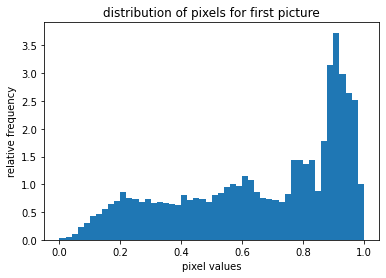

In [ ]:
# Plot pixel values of first image: 
array_img = np.array(tensor_images[0])

plt.hist(array_img.ravel(), bins=50, density=True)
plt.xlabel('pixel values')
plt.ylabel('relative frequency')
plt.title('distribution of pixels for first picture')

In [ ]:
# Calculate mean and standard deviation for 10 random pictures: 
import random
mean_pixels = torch.zeros([3, 10]) # Create empty torch arrays for mean_pixels and std_pixels
std_pixels = torch.zeros([3, 10])

for idx, img in enumerate(random.sample(tensor_images, k=10)):
  mean = img.mean([1,2])
  std = img.std([1,2])
  mean_pixels[:, idx] = mean # Store the mean pixel value for each pic
  std_pixels[:, idx] = std # Store the std pixel value for each pic

mean = mean_pixels.mean(1) # Calculate mean and std for the 10 pictures
std = std_pixels.mean(1)

print(f"Mean of 10 random images: {mean}")
print(f"Std of 10 random images: {std}")

Mean of 10 random images: tensor([0.5334, 0.4742, 0.4320])
Std of 10 random images: tensor([0.2369, 0.2457, 0.2450])


In [ ]:
# Instanciate Normalize() function with calculated mean and std
normalizer = T.Normalize(mean=list(mean), std=list(std))
normalized_images_tensor = [] # Here we stored the normalized pictures

for idx, img in enumerate(tensor_images):
  try: 
    normalized_img = normalizer(img)
    normalized_images_tensor.append(normalized_img)
  except RuntimeError as e:
    print(f"Normalization failed in index {idx}: {e}")

In [ ]:
print(f"Normalized lists lenght is {len(normalized_images_tensor)}")
print(f"df shape is {df.shape}")

Normalized lists lenght is 2501
df shape is (2501, 4)


In [ ]:
normalized_images_tensor[0]

tensor([[[1.8043, 1.7381, 1.7050,  ..., 1.6884, 1.6884, 1.7050],
         [1.8043, 1.7381, 1.7050,  ..., 1.6884, 1.6884, 1.7050],
         [1.8043, 1.7381, 1.7050,  ..., 1.6884, 1.7050, 1.7050],
         ...,
         [1.8208, 1.7381, 1.7381,  ..., 1.1587, 1.2746, 1.4567],
         [1.8208, 1.7381, 1.7215,  ..., 1.0759, 1.2414, 1.4401],
         [1.7877, 1.7381, 1.7215,  ..., 1.0593, 1.2083, 1.4401]],

        [[1.7090, 1.6451, 1.6451,  ..., 1.5973, 1.5973, 1.6132],
         [1.7090, 1.6451, 1.6451,  ..., 1.5973, 1.5973, 1.6132],
         [1.7090, 1.6451, 1.6451,  ..., 1.5973, 1.6132, 1.6132],
         ...,
         [1.7569, 1.6771, 1.6611,  ..., 0.9748, 1.1185, 1.2781],
         [1.7409, 1.6611, 1.6611,  ..., 0.9429, 1.0865, 1.3100],
         [1.7409, 1.6611, 1.6451,  ..., 0.9270, 1.0865, 1.3100]],

        [[1.9819, 1.9179, 1.9019,  ..., 1.9019, 1.9019, 1.9179],
         [1.9819, 1.9179, 1.9019,  ..., 1.9019, 1.9019, 1.9179],
         [1.9819, 1.9179, 1.9019,  ..., 1.9019, 1.9179, 1.

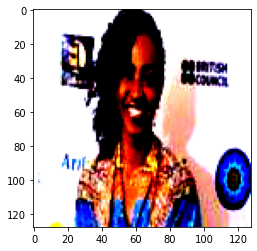

In [ ]:
plt.imshow(normalized_images_tensor[0].permute(1, 2, 0))

# Save tensors

In [ ]:
print(df.shape)
len(normalized_images_tensor)

(2501, 4)


2501

In [ ]:
path_to_save_pictures = '/content/drive/MyDrive/Colab Notebooks/CVNLP/normalized_tensor_images/'

In [ ]:
import os
import tarfile
tar = tarfile.open('/content/drive/MyDrive/Colab Notebooks/CVNLP/tensor_images.tar', "w")

for idx, img in enumerate(tqdm(normalized_images_tensor)): 
  basename, extension = os.path.splitext(df['filename'][idx]) # get filename without extension
  path = path_to_save_pictures + basename + '.pth' # extension pth is for pythorch files
  try:
    torch.save(img, path)
    tar.add(path)
  except: 
    print(f"File {df['filename'][idx]} could not be saved")
tar.close()

100%|██████████| 2501/2501 [00:49<00:00, 50.44it/s]


In [ ]:
# Source: https://discuss.pytorch.org/t/storing-images-as-tensor/20096/3